# TASK 1 
SUPERVISED LEARNING IMPLEMENTATION VIA LINEAR REGRESSION

USING THE DATASET URL WE'LL LOAD THE DATA AND PREDICT THE STUDENT MARKS BASED ON NUMBER OF HOURS HE/SHE STUDIES


Simple Linear Regression

We will split our data into testing and training sets and create a model using the training set,evaluate the model using testing set and predict the unknown value


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Now obtaining Data using the given URL:

In [2]:
url = "http://bit.ly/w-data"
Student_df = pd.read_csv(url)

In [3]:
Student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Understanding the Data


The given Student dataset posses 2 fields :

Hours : "No. of hours a student studies" 

         Eg : 4.5 hrs , 2 hrs etc
         
Scores : "Their Corresponding scores wrt to the hours studied by the student"

         Eg : 86%, 76% etc
            

## Data Exploration

Lets first have a descriptive exploration on our data

In [4]:
Student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Lets select some features to explore more.

In [10]:
cdf=Student_df[['Hours','Scores']]

In [11]:
cdf.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [12]:
viz=cdf[['Hours','Scores']]

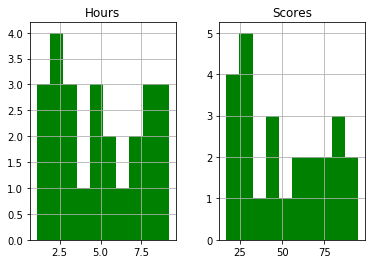

In [28]:
viz.hist(color='green')
plt.show()

Let's plot Hours vs Scores to check the realtion between the two and estimate their linearity with each other

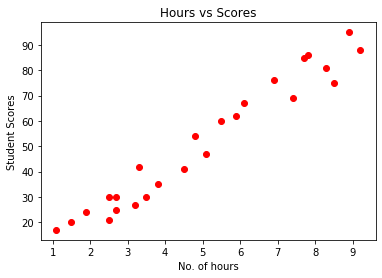

In [56]:
plt.scatter(cdf.Hours,cdf.Scores,color='red')
plt.title("Hours vs Scores")
plt.xlabel('No. of hours')
plt.ylabel('Student Scores')
plt.show()

#### Creating train and test dataset


Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [37]:
msk = np.random.rand(len(Student_df)) <0.8 
train=cdf[msk] #80%data in training set
test=cdf[~msk] #20%data in testing set

### Simple Linear Regression

We have to fit the model using linear regression with coefficients B1...Bn where n is no. features to reduce/minimize the residual sum of squares ie the squared error between the independent variable X (ie  the 'Hours') and Y(ie the 'Scores' )

#### Training/Testing Data Distribution 

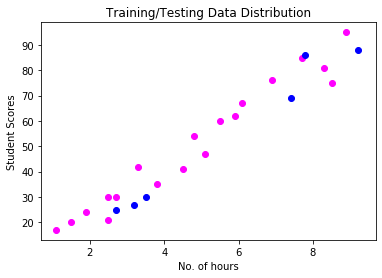

In [49]:
plt.scatter(train.Hours,train.Scores,color='magenta')
plt.scatter(test.Hours,test.Scores,color='blue')
plt.title("Training/Testing Data Distribution")
plt.xlabel('No. of hours')
plt.ylabel('Student Scores')
plt.show()

#### Modeling

In [58]:
from sklearn import linear_model
LinReg = linear_model.LinearRegression()
X_train = np.asanyarray(train[['Hours']])
y_train = np.asanyarray(train[['Scores']])
LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Linear Regression coefficients

In [63]:
print("Intercept:{} ".format(float(LinReg.intercept_)))
print("Coefficient:{}".format(float(LinReg.coef_)))

Intercept:4.2165584136885315 
Coefficient:9.638091695518227


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.

In [75]:
print("Equation of the fit : {:.2f}*x + {:.2f}".format(float(LinReg.intercept_),float(LinReg.coef_)))

Equation of the fit : 4.22*x + 9.64


### Ploting the fit

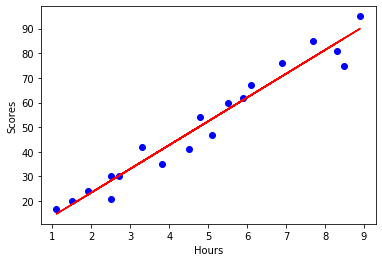

In [85]:
plt.scatter(train.Hours,train.Scores,color='b')
plt.plot(X_train,LinReg.coef_[0][0]*X_train + LinReg.intercept_[0],'r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Evaluation

we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [91]:
X_test = np.asanyarray(test[['Hours']])
y_test = np.asanyarray(test[['Scores']])
y_pred = LinReg.predict(X_test)

In [97]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred ,y_test) )

R2-score: 0.93
